<a href="https://colab.research.google.com/github/willian-gabriel-unicamp/Estrutura-da-Materia/blob/main/Po%C3%A7o_de_Potencial_Finito_E%3CV0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gráficos das soluções pares e ímpares do poço de potencial finito com E<Vo**





In [ ]:
# Importar pacotes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Variáveis de Entrada do Usúario

Entrar com o valor do potencial do poço Vo e com a largura L do poço.

In [ ]:
# Lendo as variáveis ​​de entrada do usuário
Vo = float(input("Entrar com um valor de Vo (eV) = "))
L =  float(input("Entrar com um valor de Vo L (Angstrom) = "))


Entrar com um valor de Vo (eV) = 1000
Entrar com um valor de Vo L (Angstrom) = 10


Aqui estamos deixando os valores já em eV.

Aqui na simulação estamos analisando o elétron cuja massa é de 9.10938356$\cdot 10^{-31}$ kg e um poço de potêncial indo de -L/2 até L/2.


$\sqrt(\frac{2m}{2\cdot\hbar})$

Caso queira analisar outra partícula dentro do poço de potencial troque o valor da massa.

Caso mude o potencial indo de, -L até L, por exemplo, mude o para

 $\sqrt(\frac{2m}{\hbar})$

In [ ]:
val = np.sqrt(2.0*9.10938356e-31*1.60217662e-19)*1e-10/(2.0*1.05457180013e-34) # equal to sqrt(2m*1eV)*1A/(2*h_barra)

# Gerando o gráfico

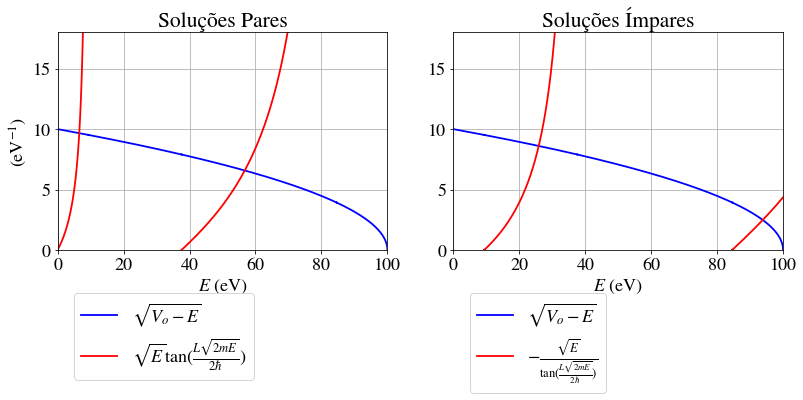

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[0].set_xlabel(r'$E$ (eV)')
axes[0].set_ylabel(r'(eV$^{-1}$)')
axes[0].set_title('Soluções Pares')
axes[0].grid()
axes[1].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[1].set_xlabel(r'$E$ (eV)')
axes[1].set_ylabel(r'')
axes[1].set_title('Soluções Ímpares')
axes[1].grid()
E = np.linspace(0.0, Vo, 10000)
num = int(round((L*np.sqrt(Vo)*val-np.pi/2.0)/np.pi))
# Removendo os pontos de discontinuidade
for n in range(10000):
    for m in range(num+2):
        if abs(E[n]-((2.0*float(m)+1.0)*np.pi/(2.0*L*val))**2)<0.01: E[n] = np.nan
        if abs(E[n]-(float(m)*np.pi/(L*val))**2)<0.01: E[n] = np.nan
# Plotando as curvas
axes[0].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[0].plot(E, np.sqrt(E)*np.tan(L*np.sqrt(E)*val), label=r"$\sqrt{E}\tan(\frac{L\sqrt{2mE}}{2\hbar})$", color="red", linewidth=1.8)
axes[1].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[1].plot(E, -np.sqrt(E)/np.tan(L*np.sqrt(E)*val), label=r"$-\frac{\sqrt{E}}{\tan(\frac{L\sqrt{2mE}}{2\hbar})}$", color="red", linewidth=1.8)
# Escolhendo a posição da legenda
axes[0].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)
axes[1].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)

# Mostrando os gráficos
plt.show()

# Juntando as duas soluções

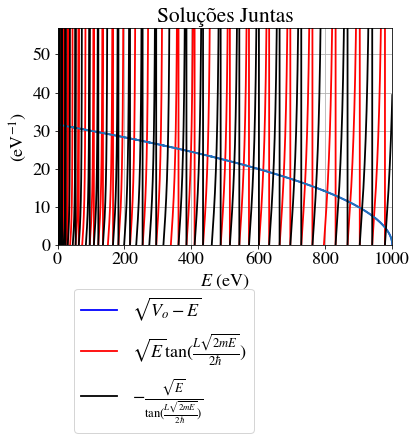

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig,ax1 = plt.subplots(1, 1)
ax1.axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
ax1.set_xlabel(r'$E$ (eV)')
ax1.set_ylabel(r'(eV$^{-1}$)')
ax1.set_title('Soluções Juntas')
ax1.grid()
E = np.linspace(0.0, Vo, 10000)
num = int(round((L*np.sqrt(Vo)*val-np.pi/2.0)/np.pi))
# Removendo os pontos de discontinuidade
for n in range(10000):
    for m in range(num+2):
        if abs(E[n]-((2.0*float(m)+1.0)*np.pi/(2.0*L*val))**2)<0.01: E[n] = np.nan
        if abs(E[n]-(float(m)*np.pi/(L*val))**2)<0.01: E[n] = np.nan
# Plotando as curvas
ax1.plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
ax1.plot(E, np.sqrt(E)*np.tan(L*np.sqrt(E)*val), label=r"$\sqrt{E}\tan(\frac{L\sqrt{2mE}}{2\hbar})$", color="red", linewidth=1.8)
ax1.plot(E, np.sqrt(Vo-E),linewidth=1.8)
ax1.plot(E, -np.sqrt(E)/np.tan(L*np.sqrt(E)*val), label=r"$-\frac{\sqrt{E}}{\tan(\frac{L\sqrt{2mE}}{2\hbar})}$", color="black", linewidth=1.8)
# Escolhendo a posição da legenda
ax1.legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)

# Mostrando os gráficos
plt.show()

Observe que quando o poço é razo, isto é, Vo é pequeno ou a largura do poço é pequena, os possíveis estados também são pequenos.

# Energias Permitidas

In [ ]:
print ("As energias limitadas permitidas são:")
# We want to find the values of E in which f_even and f_odd are zero
f_even = lambda E : np.sqrt(Vo-E)-np.sqrt(E)*np.tan(L*np.sqrt(E)*val)
f_odd = lambda E : np.sqrt(Vo-E)+np.sqrt(E)/np.tan(L*np.sqrt(E)*val)
E_old = 0.0
f_even_old = f_even(0.0)
f_odd_old = f_odd(0.0)
n = 1
E_vals = np.zeros(999)
# Here we loop from E = 0 to E = Vo seeking roots
for E in np.linspace(0.0, Vo, 200000):
    f_even_now = f_even(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_even_now == 0.0 or f_even_now/f_even_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_even_now)<1.0 and abs(f_even_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print ("  Estado #%3d (Função de onda par): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
    f_odd_now = f_odd(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_odd_now == 0.0 or f_odd_now/f_odd_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_odd_now)<1.0 and abs(f_odd_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print ("  Estado #%3d  (Função de onda ímpar): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
    E_old = E
    f_even_old = f_even_now
    f_odd_old = f_odd_now
nstates = n-1
print ("\nHá %3d ESTADO(S) DE ENERGIA PERMITIDA" % nstates)

As energias limitadas permitidas são:
  Estado #  1 (Função de onda par):    6.5568 eV,   1.05051e-18 J


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


  Estado #  2  (Função de onda ímpar):   25.9059 eV,   4.15058e-18 J
  Estado #  3 (Função de onda par):   56.7470 eV,   9.09188e-18 J
  Estado #  4  (Função de onda ímpar):   93.8472 eV,    1.5036e-17 J

Há   4 ESTADO(S) DE ENERGIA PERMITIDA


# Diagrama de Energias

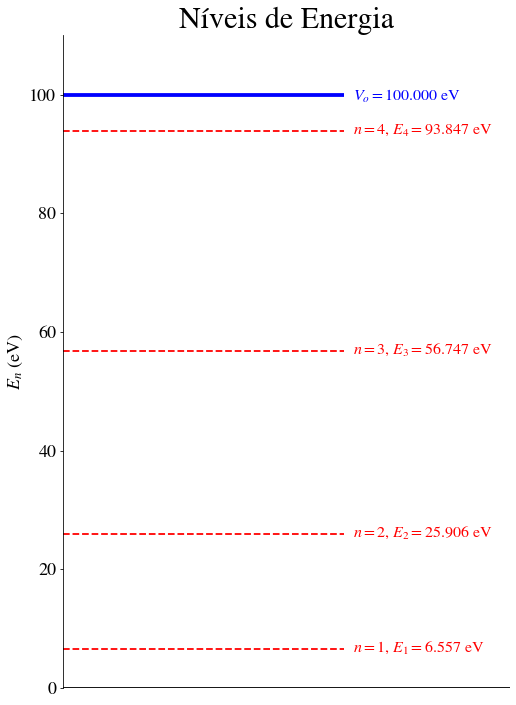

In [ ]:
# Generating the energy diagram
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.axis([0.0,10.0,0.0,1.1*Vo])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nstates+1):
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(6.5, E_vals[n-1]-0.005*Vo, str1, fontsize=16, color="red")
    ax.hlines(E_vals[n-1], 0.0, 6.3, linewidth=1.8, linestyle='--', color="red")
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(6.5, Vo-0.01*Vo, str1, fontsize=16, color="blue")
ax.hlines(Vo, 0.0, 6.3, linewidth=3.8, linestyle='-', color="blue")
ax.hlines(0.0, 0.0, 10.3, linewidth=1.8, linestyle='-', color="black")
plt.title("Níveis de Energia", fontsize=30)
plt.show()

# Fuções de Onda e probabilidades

No handles with labels found to put in legend.


As funções de onda associadas são:


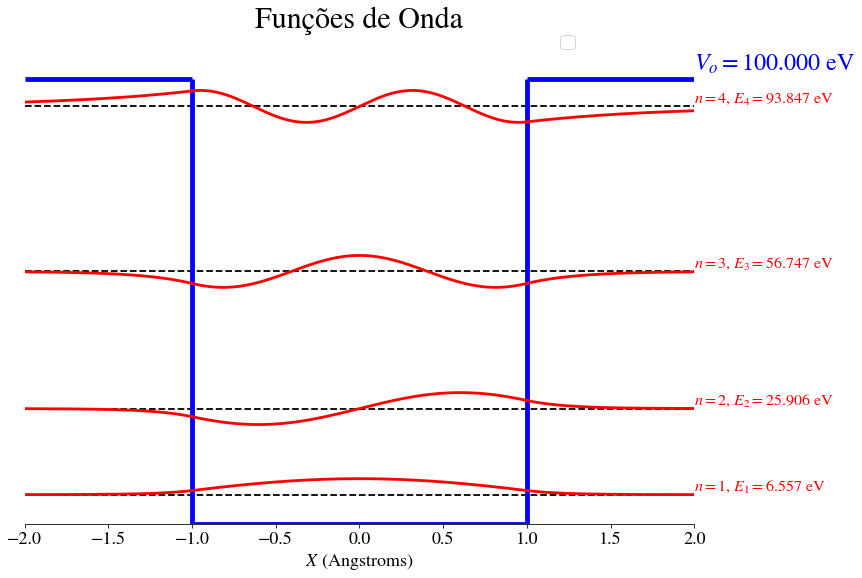

In [ ]:
print ("As funções de onda associadas são:")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if (nstates > 1):
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
else:
    amp = np.sqrt((Vo-E_vals[0])/1.5)
# Plotting the wavefunctions
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd wavefunction
    if (n%2==0):
        ax.plot(X_lef,E_vals[n-1]-amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.sin(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
    # Plotting even wavefunction
    else:
        ax.plot(X_lef,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.cos(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Funções de Onda', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

# Função de onda limitada

No handles with labels found to put in legend.



As densidades de probabilidade limitadas são mostradas abaixo com as áreas sombreadas em verde mostrando as regiões onde a partícula pode criar um túnel fora da caixa


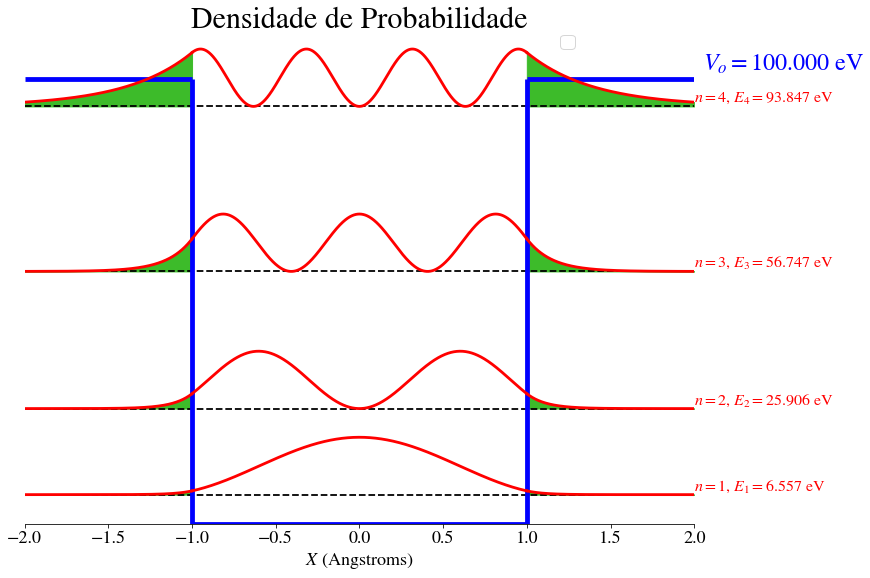

In [ ]:
print ("\nAs densidades de probabilidade limitadas são mostradas abaixo com as áreas sombreadas em verde mostrando as regiões onde a partícula pode criar um túnel fora da caixa")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.05*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the probability density
if (nstates > 1):
    amp = (E_vals[1]-E_vals[0])/1.5
else:
    amp = (Vo-E_vals[0])/1.5
# Plotting the probability densities
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd probability densities
    if (n%2==0):
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.sin(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
    # Plotting even probability densities
    else:
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.cos(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Densidade de Probabilidade', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

No poço de potencial finito temos um vazamento no lado externo da barreira. Quanto maior "n", número de estados possíveis, maior esse efeito.

É como se a partícula tunelasse mesmo não tendo energia suficiente.

# Probabilidade de Tunelar

In [ ]:
print ("\nA probabilidade de tunelar são:")
for n in range(1,nstates+1):
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # For odd solution
    if (n%2==0):
        C = 1.0
        D = np.exp(a0*L/2.0)*np.sin(k*L/2.0)*C
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L-np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    # For even solution
    else:
        B = 1.0
        D = np.exp(a0*L/2.0)*np.cos(k*L/2.0)*B
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L+np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    print ("  Estado #%3d probabilidade da partícula tunelar = %5.2f%%" % (n,100*prob))


A probabilidade de tunelar são:
  Estado #  1 probabilidade da partícula tunelar =  1.10%
  Estado #  2 probabilidade da partícula tunelar =  4.79%
  Estado #  3 probabilidade da partícula tunelar = 12.99%
  Estado #  4 probabilidade da partícula tunelar = 41.33%


In [ ]:
!pip install nbconvert
!jupyter nbconvert --to PDF "Poço_de_Potencial_Finito_E_V0.ipynb"

[NbConvertApp] Converting notebook Poço_de_Potencial_Finito_E_V0.ipynb to PDF
[NbConvertApp] Support files will be in Poço_de_Potencial_Finito_E_V0_files/
[NbConvertApp] Making directory ./Poço_de_Potencial_Finito_E_V0_files
[NbConvertApp] Making directory ./Poço_de_Potencial_Finito_E_V0_files
[NbConvertApp] Making directory ./Poço_de_Potencial_Finito_E_V0_files
[NbConvertApp] Making directory ./Poço_de_Potencial_Finito_E_V0_files
[NbConvertApp] Making directory ./Poço_de_Potencial_Finito_E_V0_files
[NbConvertApp] Writing 83200 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 236025 bytes to Poço_de_Potencial_Finito_E_V0.pdf
